# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [13]:
# Install the required libraries
!pip install prophet

In [14]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [15]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

C:\Users\250wa\AppData\Local\Temp\ipykernel_32276\1669825240.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [16]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


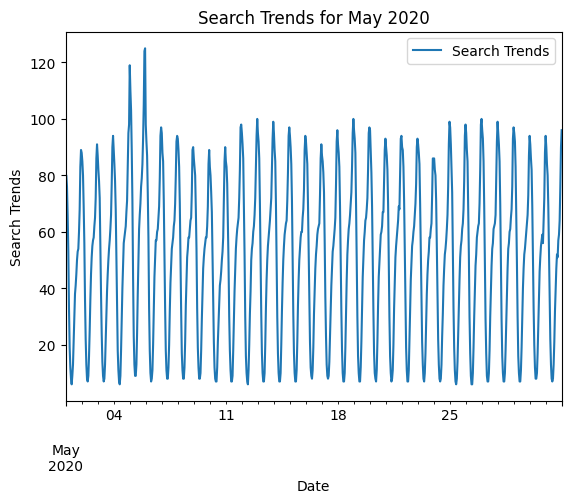

In [17]:
import matplotlib.pyplot as plt

# Slice the DataFrame to just the month of May 2020
may_2020_data = df_mercado_trends.loc['2020-05-01':'2020-05-31']

# Create the plot
ax = may_2020_data.plot(title="Search Trends for May 2020", ylabel="Search Trends")

# Explicitly display the plot
plt.show()


#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [19]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = may_2020_data["Search Trends"].sum()

# Display the result as a pandas Series with metadata
pd.Series(data=traffic_may_2020, index=["Search Trends"], name="May 2020 Total")



Search Trends    38181
Name: May 2020 Total, dtype: int64

In [21]:
# Group the DataFrame by year and month, then sum the traffic within each group
monthly_traffic = df_mercado_trends.resample('ME').sum()

# Calculate the median of the monthly traffic
median_monthly_traffic = monthly_traffic["Search Trends"].median()

# Display the result
pd.Series(data=median_monthly_traffic, index=["Search Trends"], name="Monthly Median Traffic")




Search Trends    35172.5
Name: Monthly Median Traffic, dtype: float64

In [26]:
# Compare the search traffic for the month of May 2020 to the overall monthly median value
traffic_ratio = traffic_may_2020 / median_monthly_traffic

# Display the result with context
pd.Series(data=traffic_ratio, index=["Search Trends"], name="May 2020 Traffic Ratio to Monthly Median")


Search Trends    1.085536
Name: May 2020 Traffic Ratio to Monthly Median, dtype: float64

##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** Yes, the Google search traffice icnreased in May 2020. The total was 8.5% higher than the overall monthly average search traffic. This would indicate a higher interest when MercadoLib's financial results were released

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

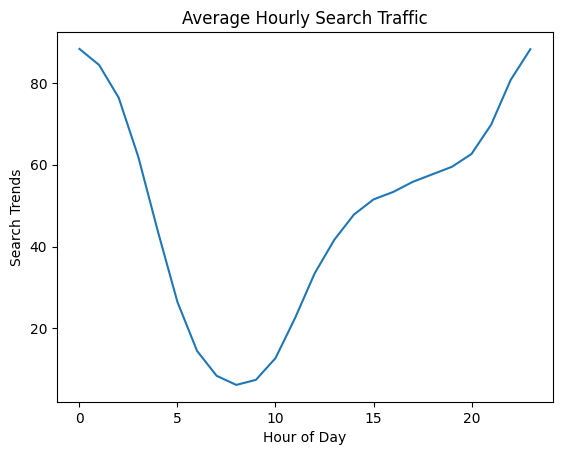

In [27]:
import matplotlib.pyplot as plt

# Group the hourly search data by the hour of the day
hourly_avg_traffic = df_mercado_trends.groupby(df_mercado_trends.index.hour).mean()

# Plot the average hourly traffic
ax = hourly_avg_traffic.plot(
    y="Search Trends",
    title="Average Hourly Search Traffic",
    ylabel="Search Trends",
    xlabel="Hour of Day",
    legend=False
)

# Explicitly display the plot
plt.show()


#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

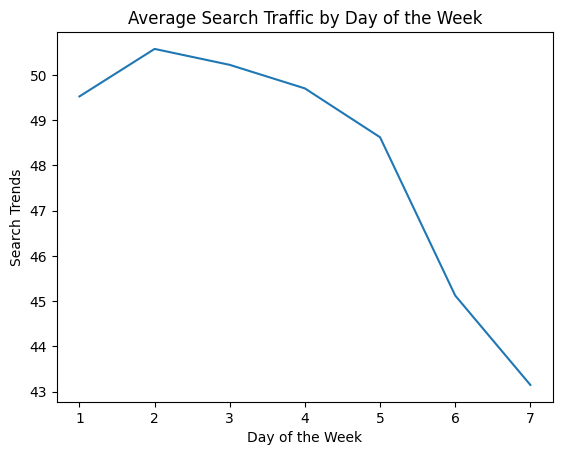

In [28]:
import matplotlib.pyplot as plt

# Group the hourly search data by the day of the week
daily_avg_traffic = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().day).mean()

# Plot the average traffic by day of the week
ax = daily_avg_traffic.plot(
    y="Search Trends",
    title="Average Search Traffic by Day of the Week",
    ylabel="Search Trends",
    xlabel="Day of the Week",
    legend=False
)

# Explicitly display the plot
plt.show()



#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

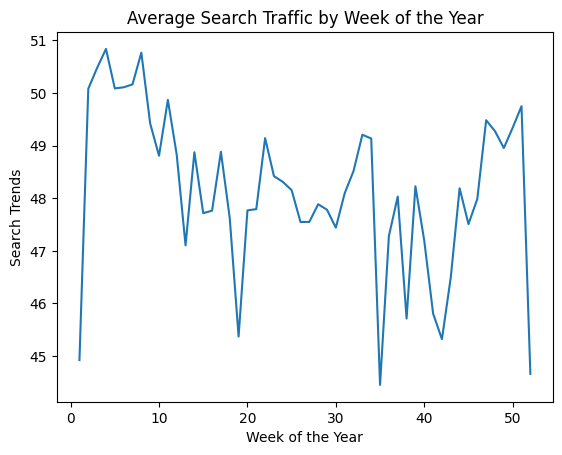

In [29]:
import matplotlib.pyplot as plt

# Group the hourly search data by the week of the year
weekly_avg_traffic = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().week).mean()

# Plot the average traffic by week of the year
ax = weekly_avg_traffic.plot(
    y="Search Trends",
    title="Average Search Traffic by Week of the Year",
    ylabel="Search Trends",
    xlabel="Week of the Year",
    legend=False
)

# Explicitly display the plot
plt.show()



##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:** Yes, Hourly trends, daily trends, weekly trends, and seasonal trends. 

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [30]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


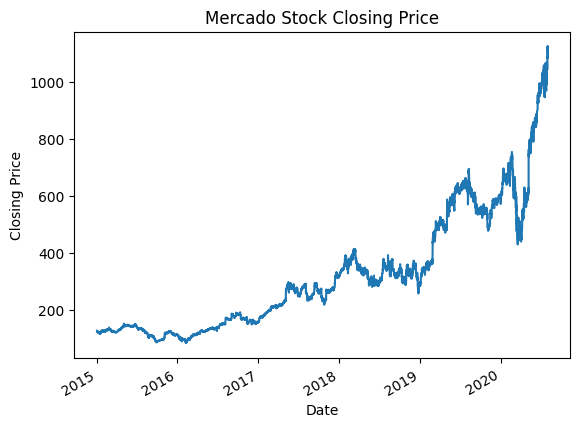

In [31]:
# Visualize the closing price of the df_mercado_stock DataFrame

df_mercado_stock['close'].plot(
    title="Mercado Stock Closing Price",
    ylabel="Closing Price",
    xlabel="Date",
    legend=False
)
plt.show()



In [32]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop rows with only one column of data
df_combined = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna()

# View the first and last five rows of the DataFrame
display(df_combined.head())
display(df_combined.tail())



,close,Search Trends
2016-06-01 09:00:00,135.16,6.0
2016-06-01 10:00:00,136.63,12.0
2016-06-01 11:00:00,136.56,22.0
2016-06-01 12:00:00,136.42,33.0
2016-06-01 13:00:00,136.10,40.0


,close,Search Trends
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0
2020-07-31 15:00:00,1122.510,53.0


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [33]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
first_half_2020 = df_combined.loc['2020-01':'2020-06']

# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head())
display(first_half_2020.tail())



,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


,close,Search Trends
2020-06-30 11:00:00,976.17,17.0
2020-06-30 12:00:00,977.50,27.0
2020-06-30 13:00:00,973.23,37.0
2020-06-30 14:00:00,976.50,45.0
2020-06-30 15:00:00,984.93,51.0


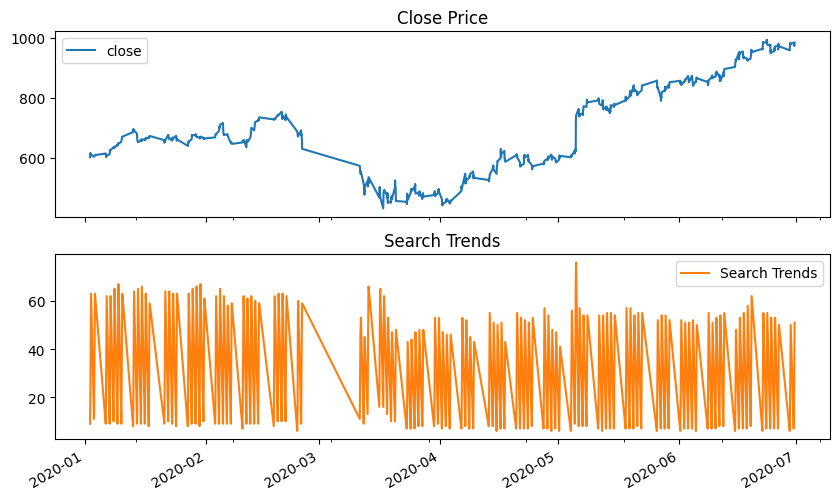

In [39]:
# Visualize the close and Search Trends data
first_half_2020.plot(
    subplots=True,  # Plot each column on separate axes
    title=["Close Price", "Search Trends"],  # Titles for the subplots
    figsize=(10, 6)  # Adjust figure size if needed
)
plt.show()  # Explicitly display the plot



##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** Yes, both the stock price and search trends show a similar pattern in the first half of 2020. As search trends increased, likely because more people were interested in e-commerce during the market changes, the stock price also went up. This suggests that more attention to the company helped boost its value.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [44]:
# Re-concatenate the DataFrames along columns
df_mercado_stock = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna()

# Verify the columns to ensure 'Search Trends' is present
print(df_mercado_stock.columns)

# Create a new column in the df_mercado_stock DataFrame called 'Lagged Search Trends'
# This column shifts the 'Search Trends' information by one hour
df_mercado_stock['Lagged Search Trends'] = df_mercado_stock['Search Trends'].shift(1)







Index(['close', 'Search Trends'], dtype='object')


In [45]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
df_mercado_stock['Stock Volatility'] = df_mercado_stock['close'].pct_change().rolling(window=4).std()




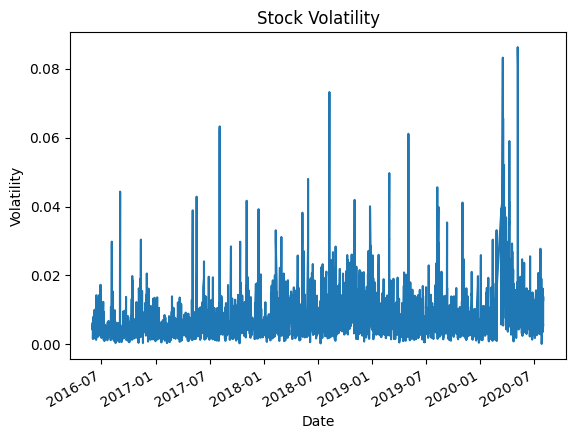

In [46]:
# Visualize the stock volatility
df_mercado_stock['Stock Volatility'].plot(
    title="Stock Volatility",
    ylabel="Volatility",
    xlabel="Date",
    legend=False
)
plt.show()




**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [47]:
# Create a new column in the df_mercado_stock DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
df_mercado_stock['Hourly Stock Return'] = df_mercado_stock['close'].pct_change()




In [51]:
# View the first and last five rows of the df_mercado_stock DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())



,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN,0.010876
2016-06-01 11:00:00,136.56,22.0,12.0,NaN,-0.000512
2016-06-01 12:00:00,136.42,33.0,22.0,NaN,-0.001025
2016-06-01 13:00:00,136.10,40.0,33.0,0.006134,-0.002346


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,11.0,0.012837,0.006380
2020-07-31 12:00:00,1087.925,32.0,20.0,0.013549,-0.016147
2020-07-31 13:00:00,1095.800,41.0,32.0,0.013295,0.007239
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013001,0.013552
2020-07-31 15:00:00,1122.510,53.0,47.0,0.013566,0.010678


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [55]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
df_mercado_stock[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()




,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.148938,0.061424
Lagged Search Trends,-0.148938,1.000000,0.017929
Hourly Stock Return,0.061424,0.017929,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** In my opinion no, there isn’t a strong relationship. The correlation between lagged search traffic and stock volatility is weak (-0.15), and with hourly stock returns, it’s almost zero (0.02). It doesn’t look predictive.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [57]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
mercado_prophet_df = df_mercado_trends.reset_index()

# Label the columns 'ds' and 'y' so that the syntax is recognized by Prophet
mercado_prophet_df.rename(columns={'index': 'ds', 'Search Trends': 'y'}, inplace=True)

# Drop any NaN values from the mercado_prophet_df DataFrame
mercado_prophet_df.dropna(inplace=True)

# View the first and last five rows of the mercado_prophet_df DataFrame
print(mercado_prophet_df.head())
print(mercado_prophet_df.tail())



                 Date   y
0 2016-06-01 00:00:00  97
1 2016-06-01 01:00:00  92
2 2016-06-01 02:00:00  76
3 2016-06-01 03:00:00  60
4 2016-06-01 04:00:00  38
                     Date   y
37101 2020-09-07 20:00:00  71
37102 2020-09-07 21:00:00  83
37103 2020-09-07 22:00:00  96
37104 2020-09-07 23:00:00  97
37105 2020-09-08 00:00:00  96


In [72]:
from prophet import Prophet

# Call the Prophet function and store it as an object
model = Prophet()
model




In [73]:
from prophet import Prophet

# Instantiate a new Prophet object
model = Prophet()

# Fit the model
model.fit(mercado_prophet_df)










19:41:44 - cmdstanpy - INFO - Chain [1] start processing
19:42:00 - cmdstanpy - INFO - Chain [1] done processing


In [76]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='h')

# View the last five rows of the future_mercado_trends DataFrame
print(future_mercado_trends.tail())



                       ds
39101 2020-11-30 04:00:00
39102 2020-11-30 05:00:00
39103 2020-11-30 06:00:00
39104 2020-11-30 07:00:00
39105 2020-11-30 08:00:00


In [77]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
print(forecast_mercado_trends.head())


                   ds      trend  yhat_lower  yhat_upper  trend_lower  \
0 2016-06-01 00:00:00  44.352625   81.105118   97.890455    44.352625   
1 2016-06-01 01:00:00  44.353557   78.204562   94.298230    44.353557   
2 2016-06-01 02:00:00  44.354489   67.119301   83.391332    44.354489   
3 2016-06-01 03:00:00  44.355421   51.838170   69.148586    44.355421   
4 2016-06-01 04:00:00  44.356353   34.851395   51.902892    44.356353   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    44.352625       45.307367             45.307367             45.307367   
1    44.353557       41.753097             41.753097             41.753097   
2    44.354489       31.429548             31.429548             31.429548   
3    44.355421       16.162280             16.162280             16.162280   
4    44.356353       -0.952639             -0.952639             -0.952639   

       daily  ...    weekly  weekly_lower  weekly_upper    yearly  \
0  41.452720  ...  1.86

#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

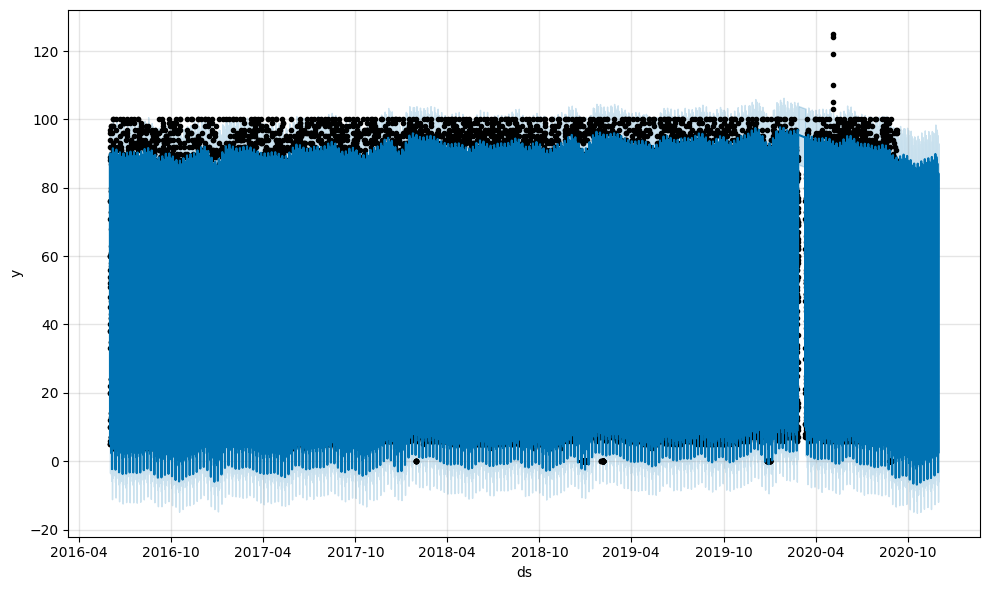

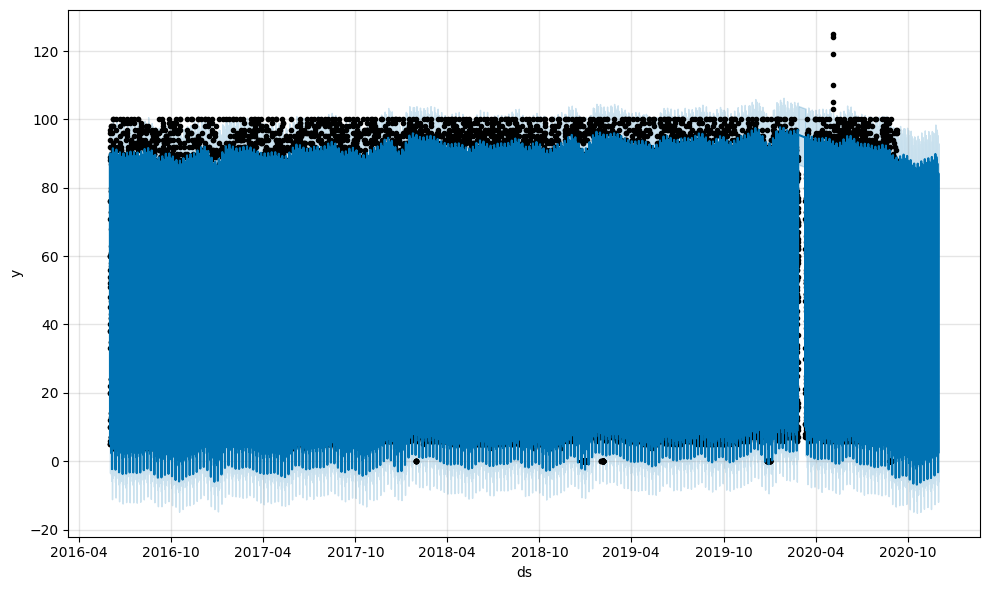

In [79]:
# Plot the Prophet predictions for the Mercado trends data
import matplotlib.pyplot as plt

fig = model.plot(forecast_mercado_trends)
plt.show()





##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**   The near-term forecast for MercadoLibre shows that its popularity is expected to stay pretty steady. There might be small ups and downs, but overall, it looks like search interest won’t change a lot in the near future.


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [80]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends.set_index('ds', inplace=True)

# View only the yhat, yhat_lower, and yhat_upper columns from the DataFrame
print(forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].head())




                          yhat  yhat_lower  yhat_upper
ds                                                    
2016-06-01 00:00:00  89.659992   81.105118   97.890455
2016-06-01 01:00:00  86.106654   78.204562   94.298230
2016-06-01 02:00:00  75.784037   67.119301   83.391332
2016-06-01 03:00:00  60.517701   51.838170   69.148586
2016-06-01 04:00:00  43.403713   34.851395   51.902892


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

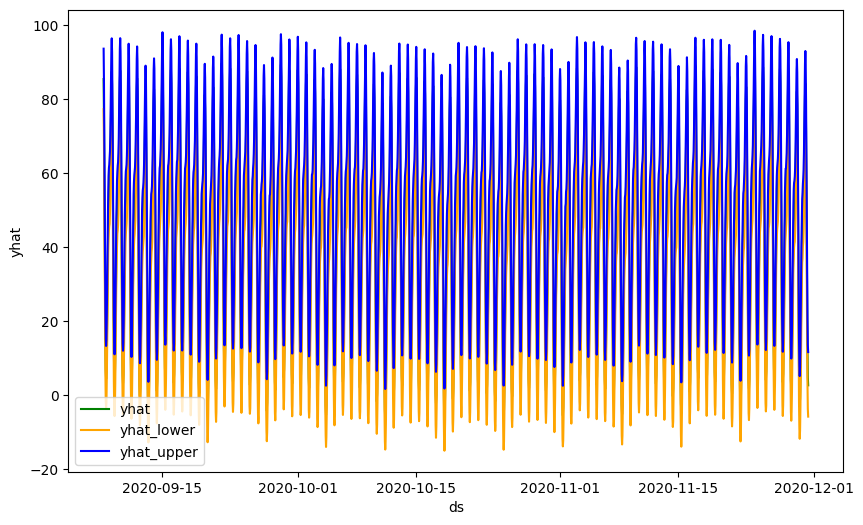

In [81]:
# Plot the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
import matplotlib.pyplot as plt

# Filter the data for the last 2000 hours
forecast_mercado_trends_last_2000 = forecast_mercado_trends.tail(2000)

# Plot the data
plt.figure(figsize=(10,6))
plt.plot(forecast_mercado_trends_last_2000.index, forecast_mercado_trends_last_2000['yhat'], label='yhat', color='green')
plt.plot(forecast_mercado_trends_last_2000.index, forecast_mercado_trends_last_2000['yhat_lower'], label='yhat_lower', color='orange')
plt.plot(forecast_mercado_trends_last_2000.index, forecast_mercado_trends_last_2000['yhat_upper'], label='yhat_upper', color='blue')

# Add labels and legend
plt.xlabel('ds')
plt.ylabel('yhat')
plt.legend()

# Show the plot
plt.show()



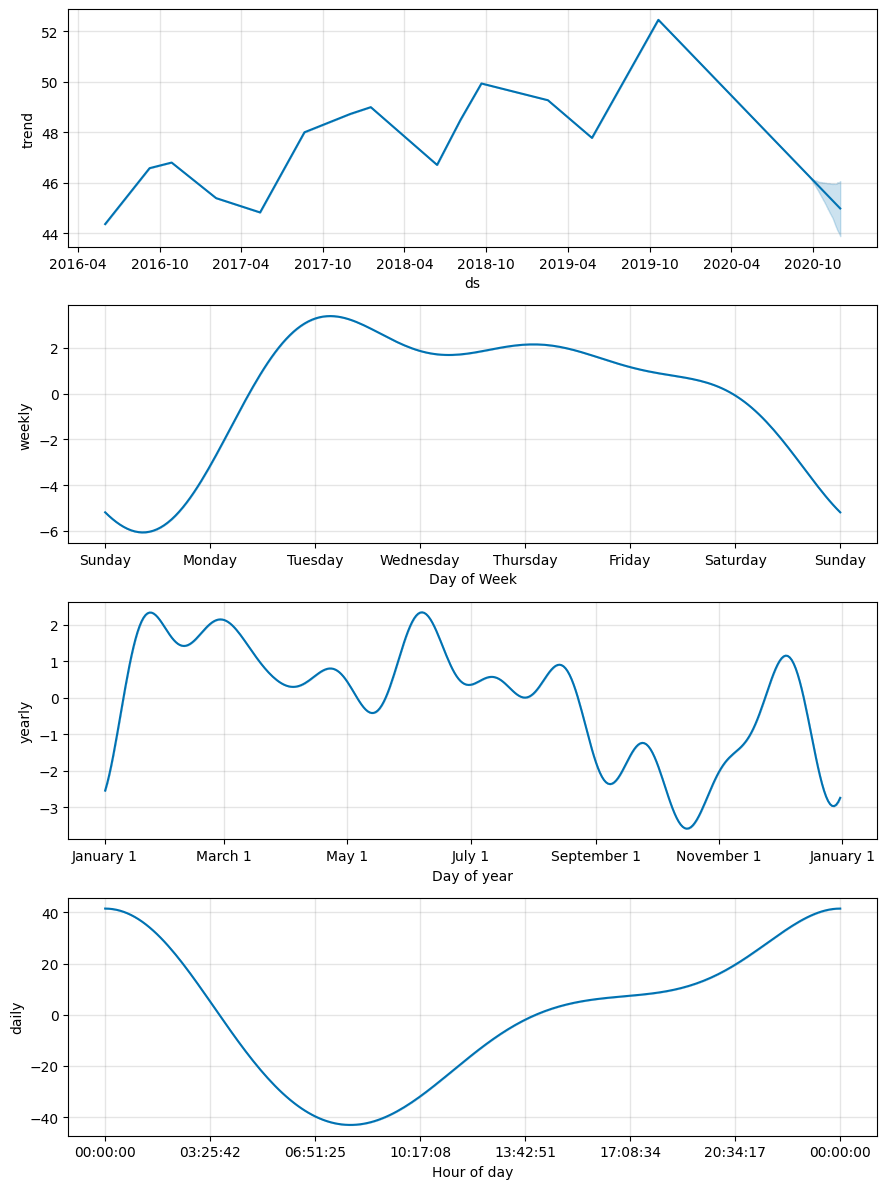

In [82]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends.reset_index(inplace=True)

# Use the plot_components function to visualize the forecast results
model.plot_components(forecast_mercado_trends)



##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:**  The greatest popularity occurs during midday, around noon.

**Question:** Which day of week gets the most search traffic?
   
**Answer:**   Sunday gets the most search traffic.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:**  The lowest point for search traffic occurs around the start of the year, specifically during January.
